In [1]:
!python -V

Python 3.11.7


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
import pickle

In [3]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [4]:
(df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [5]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime

In [6]:
df.duration.describe()

count                   3066766
mean     0 days 00:15:40.139710
std      0 days 00:42:35.661074
min           -1 days +23:30:48
25%             0 days 00:07:07
50%             0 days 00:11:31
75%             0 days 00:18:18
max             6 days 23:09:11
Name: duration, dtype: object

In [7]:
df.duration = df.duration.apply(lambda td: td.total_seconds()/60)

/tmp/ipykernel_3261/3426635498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)
/home/codespace/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='duration', ylabel='Density'>

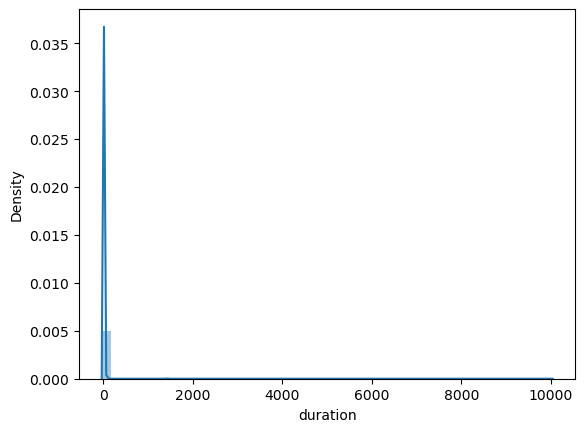

In [16]:
sns.distplot(df.duration)

In [17]:
df.duration.describe(percentiles=[0.9,0.95,0.96,0.97,0.98,0.99,1.0])

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
50%      1.151667e+01
90%      2.794167e+01
95%      3.646667e+01
96%      3.945000e+01
97%      4.335000e+01
98%      4.873333e+01
99%      5.725000e+01
100%     1.002918e+04
max      1.002918e+04
Name: duration, dtype: float64

In [18]:
((df.duration >=1) & (df.duration <=60)).mean()

0.9812202822125979

In [19]:
df_avgtrips = df[(df.duration >=1) & (df.duration <=60)]

In [20]:
df_avgtrips.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [21]:
categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

In [22]:
df_avgtrips[categorical] = df_avgtrips[categorical].astype(str)

/tmp/ipykernel_3261/1194591429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avgtrips[categorical] = df_avgtrips[categorical].astype(str)


In [23]:
df_avgtrips.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [24]:
train_dicts = df_avgtrips[categorical].to_dict(orient='records')

In [25]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [26]:
X_train

<3009173x515 sparse matrix of type '<class 'numpy.float64'>'
	with 6018346 stored elements in Compressed Sparse Row format>

In [28]:
len(dv.feature_names_)

515

In [29]:
target = 'duration'
y_train = df_avgtrips[target].values

In [30]:
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [31]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred = lr.predict(X_train)

/home/codespace/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


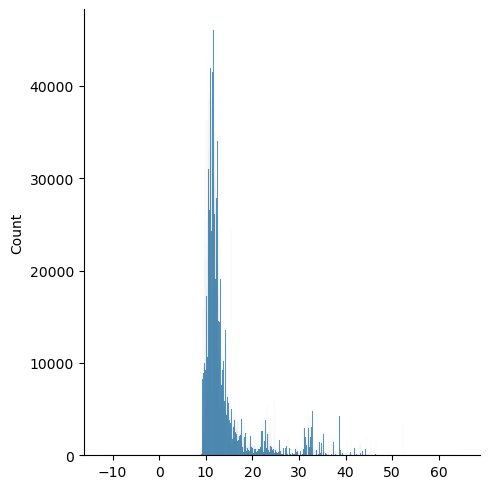

In [33]:
sns.displot(y_pred, label='prediction')

/home/codespace/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


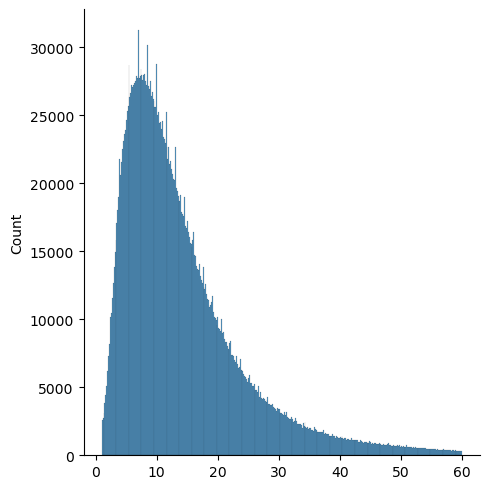

In [34]:
sns.displot(y_train, label='actual')

/tmp/ipykernel_3261/1505421196.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/home/codespace/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_3261/1505421196.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level fun

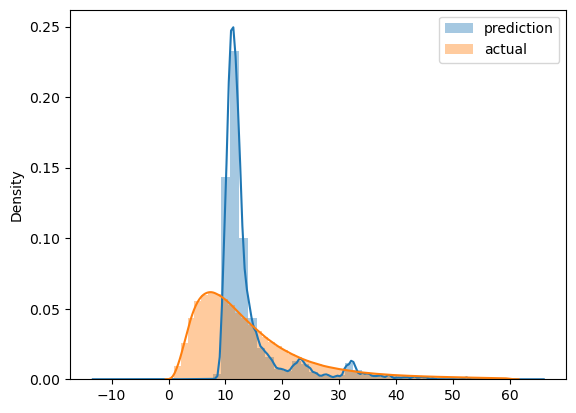

In [35]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')
plt.legend()

In [36]:
mean_squared_error(y_train, y_pred, squared = False)
#squared = False to get root mean squared error value

7.649261930819891

In [8]:
def read_dataFrame(filename):
    df = pd.read_parquet(filename)
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds()/60)
    df = df[(df.duration >=1) & (df.duration <=60)]
    categorical = ['PULocationID','DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [9]:
df_train = read_dataFrame('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_val = read_dataFrame('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [10]:

df_val.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
duration                        float64
dtype: object

In [11]:
categorical = ['PULocationID','DOLocationID']
dv = DictVectorizer()

In [12]:
train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)


In [13]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [16]:
lr1 = LinearRegression()
lr1.fit(X_train,y_train)

y_pred_train = lr1.predict(X_train)
y_pred_val = lr1.predict(X_val)

print(mean_squared_error(y_train, y_pred_train, squared=False))
print(mean_squared_error(y_val, y_pred_val, squared=False))


7.649261930819891
7.811817675774269


In [17]:
with open('./models/lin_reg_hw1.bin','wb') as f:
    pickle.dump((dv,lr1), f)